In [2]:
from optimizer_supervised import Optimizer
from model import TransformerModel
from Hamiltonian import Ising

In [3]:
import numpy as np
import torch

In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to GPU
    device = torch.device("cuda")
    print("GPU is available")
else:
    # Set the device to CPU
    device = torch.device("cpu")
    print("GPU is not available, using CPU")

GPU is available


In [5]:
torch.set_default_tensor_type(
    torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
)

/home/spandan/anaconda3/envs/tqs2/lib/python3.12/site-packages/torch/__init__.py:749: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1718580740865/work/torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


In [6]:
system_sizes = np.arange(8, 21, 2).reshape(-1, 1)
Hamiltonians = [Ising(size, periodic=True) for size in system_sizes]
param_dim = Hamiltonians[0].param_dim
embedding_size = 32
n_head = 8
n_hid = embedding_size
n_layers = 8
dropout = 0
minibatch = 10000

print("Sizes:", system_sizes)
print("Hamiltonians:", Hamiltonians)
print("Param dim:", param_dim)

Sizes: [[ 8]
 [10]
 [12]
 [14]
 [16]
 [18]
 [20]]
Hamiltonians: [<Hamiltonian.Ising object at 0x73ef56f05a00>, <Hamiltonian.Ising object at 0x73ee8f6284a0>, <Hamiltonian.Ising object at 0x73ee8f658dd0>, <Hamiltonian.Ising object at 0x73ee8f659580>, <Hamiltonian.Ising object at 0x73ee8f6590d0>, <Hamiltonian.Ising object at 0x73ee8fcaad20>, <Hamiltonian.Ising object at 0x73ee8fb831a0>]
Param dim: 1


/home/spandan/Projects/tqs/Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [7]:
model = TransformerModel(
    system_sizes,
    param_dim,
    embedding_size,
    n_head,
    n_hid,
    n_layers,
    dropout=dropout,
    minibatch=minibatch,
)

/home/spandan/anaconda3/envs/tqs2/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [8]:
param_range = None
point_of_interest = None
use_SR = False

In [9]:
import os

results_dir = "results"
paper_checkpoint_name = "ckpt_100000_Ising_32_8_8_0.ckpt"
paper_checkpoint_path = os.path.join(results_dir, paper_checkpoint_name)
checkpoint = torch.load(paper_checkpoint_path)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [10]:
system_size = torch.tensor([8])
param = torch.tensor([1])
model.set_param(system_size=system_size, param=param)

print(model.param)
print(model.system_size)

tensor([1])
tensor([8])


In [11]:
from model_utils import compute_psi

In [12]:
H = Hamiltonians[0]
basis = H.generate_basis()
symmetry = H.symmetry
log_amp, log_phase = compute_psi(model, basis, symmetry, check_duplicate=True)
print("Log_amp:", log_amp)
print("Log_phase:", log_phase)

Log_amp: tensor([-2.0976, -3.4979, -4.4319, -3.9907, -4.5735, -5.6401, -5.1897, -4.2165,
        -4.6109, -5.9042, -6.6457, -5.9785, -5.4484, -6.2376, -5.4798, -4.2866,
        -4.6109, -5.9574, -6.8388, -6.3026, -6.8141, -7.7420, -7.1751, -6.0699,
        -5.5077, -6.6716, -7.2662, -6.4028, -5.7669, -6.3823, -5.5214, -4.2165,
        -4.5735, -5.9367, -6.8522, -6.3582, -6.9464, -7.9436, -7.4511, -6.4028,
        -6.8141, -8.0271, -8.7022, -7.9249, -7.3931, -8.0647, -7.2521, -5.9785,
        -5.4484, -6.7233, -7.5534, -6.8911, -7.3931, -8.1801, -7.5193, -6.3026,
        -5.7669, -6.8270, -7.3450, -6.3582, -5.7443, -6.2558, -5.3533, -3.9907,
        -4.4319, -5.8070, -6.7322, -6.2558, -6.8522, -7.8745, -7.3981, -6.3823,
        -6.8388, -8.0874, -8.7958, -8.0647, -7.5534, -8.2718, -7.4838, -6.2376,
        -6.6457, -7.9463, -8.7958, -8.1801, -8.7022, -9.5404, -8.9196, -7.7420,
        -7.2662, -8.3573, -8.8983, -7.9436, -7.3450, -7.8745, -6.9919, -5.6401,
        -5.1897, -6.5174, -7.39

In [13]:
print(torch.tensor(H.generate_basis())[4])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


/tmp/ipykernel_424372/715684954.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(H.generate_basis())[4])


It's quite nice that the phases are a periodic sequence:


In [14]:
amp = torch.sqrt(torch.exp(log_amp))
phase = torch.exp(log_phase)

print("Amplitude:", amp)
print("Phase:", phase)

Amplitude: tensor([0.3504, 0.1740, 0.1090, 0.1360, 0.1016, 0.0596, 0.0747, 0.1214, 0.0997,
        0.0522, 0.0361, 0.0503, 0.0656, 0.0442, 0.0646, 0.1173, 0.0997, 0.0509,
        0.0327, 0.0428, 0.0331, 0.0208, 0.0277, 0.0481, 0.0637, 0.0356, 0.0264,
        0.0407, 0.0559, 0.0411, 0.0632, 0.1214, 0.1016, 0.0514, 0.0325, 0.0416,
        0.0310, 0.0188, 0.0241, 0.0407, 0.0331, 0.0181, 0.0129, 0.0190, 0.0248,
        0.0177, 0.0266, 0.0503, 0.0656, 0.0347, 0.0229, 0.0319, 0.0248, 0.0167,
        0.0233, 0.0428, 0.0559, 0.0329, 0.0254, 0.0416, 0.0566, 0.0438, 0.0688,
        0.1360, 0.1090, 0.0548, 0.0345, 0.0438, 0.0325, 0.0195, 0.0247, 0.0411,
        0.0327, 0.0175, 0.0123, 0.0177, 0.0229, 0.0160, 0.0237, 0.0442, 0.0361,
        0.0188, 0.0123, 0.0167, 0.0129, 0.0085, 0.0116, 0.0208, 0.0264, 0.0153,
        0.0117, 0.0188, 0.0254, 0.0195, 0.0303, 0.0596, 0.0747, 0.0384, 0.0247,
        0.0329, 0.0241, 0.0153, 0.0201, 0.0356, 0.0277, 0.0156, 0.0116, 0.0181,
        0.0233, 0.0175, 0.026

In [15]:
psi_predicted = amp.mul(torch.exp(1j * phase))
print(psi_predicted)

tensor([ 0.2344+0.2604j, -0.1654-0.0538j, -0.0872-0.0654j,  0.0908+0.1012j,
        -0.0835-0.0578j,  0.0397+0.0445j,  0.0498+0.0556j, -0.0639-0.1033j,
        -0.0781-0.0620j,  0.0348+0.0389j,  0.0240+0.0269j, -0.0142-0.0483j,
         0.0437+0.0489j,  0.0189-0.0399j, -0.0015-0.0646j,  0.0782+0.0874j,
        -0.0781-0.0620j,  0.0339+0.0380j,  0.0218+0.0244j, -0.0315-0.0290j,
         0.0221+0.0247j,  0.0107-0.0179j, -0.0184-0.0207j,  0.0321+0.0358j,
         0.0425+0.0474j, -0.0221-0.0279j, -0.0060-0.0257j,  0.0271+0.0303j,
        -0.0551-0.0095j,  0.0274+0.0307j,  0.0421+0.0472j, -0.0639-0.1033j,
        -0.0835-0.0578j,  0.0342+0.0384j,  0.0217+0.0243j, -0.0166-0.0382j,
         0.0207+0.0231j,  0.0125-0.0141j, -0.0230-0.0072j,  0.0271+0.0303j,
         0.0221+0.0247j,  0.0027-0.0179j, -0.0040-0.0123j,  0.0127+0.0142j,
        -0.0200-0.0147j,  0.0118+0.0132j,  0.0177+0.0199j, -0.0142-0.0483j,
         0.0437+0.0489j,  0.0044-0.0344j, -0.0189-0.0130j,  0.0213+0.0237j,
        -0.0

In [16]:
energy, psi_true = H.calc_ground(param=1)
psi_true = torch.tensor(psi_true)
print(psi_true)

tensor([-0.4591,  0.1292,  0.1292, -0.0774,  0.1292, -0.0404, -0.0774,  0.0607,
         0.1292, -0.0378, -0.0404,  0.0274, -0.0774,  0.0274,  0.0607, -0.0564,
         0.1292, -0.0375, -0.0378,  0.0246, -0.0404,  0.0137,  0.0274, -0.0247,
        -0.0774,  0.0246,  0.0274, -0.0221,  0.0607, -0.0247, -0.0564,  0.0607,
         0.1292, -0.0378, -0.0375,  0.0246, -0.0378,  0.0128,  0.0246, -0.0221,
        -0.0404,  0.0128,  0.0137, -0.0110,  0.0274, -0.0113, -0.0247,  0.0274,
        -0.0774,  0.0246,  0.0246, -0.0192,  0.0274, -0.0110, -0.0221,  0.0246,
         0.0607, -0.0221, -0.0247,  0.0246, -0.0564,  0.0274,  0.0607, -0.0774,
         0.1292, -0.0404, -0.0378,  0.0274, -0.0375,  0.0137,  0.0246, -0.0247,
        -0.0378,  0.0128,  0.0128, -0.0113,  0.0246, -0.0110, -0.0221,  0.0274,
        -0.0404,  0.0137,  0.0128, -0.0110,  0.0137, -0.0060, -0.0110,  0.0137,
         0.0274, -0.0110, -0.0113,  0.0128, -0.0247,  0.0137,  0.0274, -0.0404,
        -0.0774,  0.0274,  0.0246, -0.02

/tmp/ipykernel_424372/4156994520.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  psi_true = torch.tensor(psi_true)


Is it just a phase difference?


In [17]:
modulus = torch.abs(psi_predicted)
print(modulus)

tensor([0.3504, 0.1740, 0.1090, 0.1360, 0.1016, 0.0596, 0.0747, 0.1214, 0.0997,
        0.0522, 0.0361, 0.0503, 0.0656, 0.0442, 0.0646, 0.1173, 0.0997, 0.0509,
        0.0327, 0.0428, 0.0331, 0.0208, 0.0277, 0.0481, 0.0637, 0.0356, 0.0264,
        0.0407, 0.0559, 0.0411, 0.0632, 0.1214, 0.1016, 0.0514, 0.0325, 0.0416,
        0.0310, 0.0188, 0.0241, 0.0407, 0.0331, 0.0181, 0.0129, 0.0190, 0.0248,
        0.0177, 0.0266, 0.0503, 0.0656, 0.0347, 0.0229, 0.0319, 0.0248, 0.0167,
        0.0233, 0.0428, 0.0559, 0.0329, 0.0254, 0.0416, 0.0566, 0.0438, 0.0688,
        0.1360, 0.1090, 0.0548, 0.0345, 0.0438, 0.0325, 0.0195, 0.0247, 0.0411,
        0.0327, 0.0175, 0.0123, 0.0177, 0.0229, 0.0160, 0.0237, 0.0442, 0.0361,
        0.0188, 0.0123, 0.0167, 0.0129, 0.0085, 0.0116, 0.0208, 0.0264, 0.0153,
        0.0117, 0.0188, 0.0254, 0.0195, 0.0303, 0.0596, 0.0747, 0.0384, 0.0247,
        0.0329, 0.0241, 0.0153, 0.0201, 0.0356, 0.0277, 0.0156, 0.0116, 0.0181,
        0.0233, 0.0175, 0.0268, 0.0522, 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>]], dtype=object)

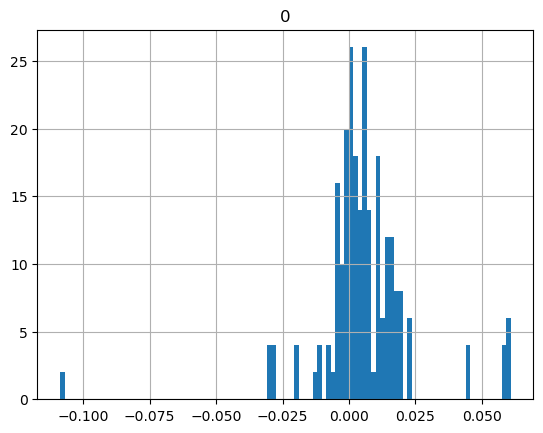

In [19]:
diffs = modulus - torch.abs(psi_true)
diffs = diffs.cpu().detach().numpy()
diffs_df = pd.DataFrame(diffs)
diffs_df.hist(bins=100)

Despite a few outliers, it seems that the amplitude difference between the predictions and true values is small


In [20]:
diffs_df.describe()

,0
count,256.000000
mean,0.005736
std,0.018632
min,-0.108726
25%,-0.000603
50%,0.004704
75%,0.012894
max,0.060911


Is the phase difference global?


In [21]:
phase_true = torch.angle(psi_true)
phase_predicted = torch.angle(psi_predicted)

phase_difference = phase_true - phase_predicted
print(phase_difference)

tensor([ 2.3038,  2.8275,  2.4979,  2.3016,  2.5358,  2.2991,  2.3007,  2.1248,
         2.4708,  2.3000,  2.3000,  1.8562,  2.3007,  1.1280,  1.5947,  2.3002,
         2.4708,  2.2991,  2.3005,  2.3972,  2.3014,  1.0300,  2.2987,  2.3010,
         2.3010,  2.2405,  1.7999,  2.3009,  2.9704,  2.2992,  2.2999,  2.1248,
         2.5358,  2.2986,  2.2997,  1.9821,  2.3017,  0.8436,  2.8386,  2.3009,
         2.3014,  1.4214,  1.8848,  2.2992,  2.5075,  2.2987,  2.2995,  1.8564,
         2.3007,  1.4450,  2.5397,  2.3024,  2.5075,  2.2994,  2.3006,  2.3972,
         2.9704,  2.3015,  2.2991,  1.9821,  2.3021,  1.2181,  1.3932,  2.3016,
         2.4979,  2.2979,  2.2990,  1.2181,  2.2997, -0.1265,  1.7114,  2.2992,
         2.3005,  0.9784,  1.1095,  2.2987,  2.5397,  2.2995,  2.2989,  1.1280,
         2.3000,  0.4436,  1.1095,  2.2994,  1.8848,  2.2984,  2.2991,  1.0300,
         1.7999,  2.2992,  2.2976,  0.8436,  2.2991, -0.1265, -0.0409,  2.2991,
         2.3007,  0.7200,  1.7114,  2.30

Phase differences are not global.


In [22]:
print(phase_true)
print(phase_predicted)

tensor([3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000,
        3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416,
        3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000,
        3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000,
        3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000,
        3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416,
        3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000,
        3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416,
        3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416,
        0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416,
        3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000,
        3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000,
        3.1416, 0.0000, 0.0000, 3.1416, 

In [23]:
wrong_phase = torch.exp(log_phase)
print(wrong_phase)

tensor([  0.8378, 449.5619, 449.8915,   0.8400, 449.8535,   0.8425,   0.8409,
        450.2645, 449.9185,   0.8416,   0.8416, 450.5331,   0.8409, 451.2614,
        450.7947,   0.8414, 449.9185,   0.8425,   0.8411, 449.9921,   0.8402,
        451.3593, 450.0906,   0.8406,   0.8406, 450.1488, 450.5894,   0.8407,
        449.4189,   0.8424,   0.8417, 450.2645, 449.8535,   0.8430,   0.8419,
        450.4073,   0.8399, 451.5457, 449.5508,   0.8407,   0.8402, 450.9680,
        450.5046,   0.8424, 449.8818,   0.8429,   0.8421, 450.5329,   0.8409,
        450.9443, 449.8497,   0.8392, 449.8818,   0.8422,   0.8410, 449.9921,
        449.4189,   0.8401,   0.8425, 450.4073,   0.8395, 451.1712, 450.9962,
          0.8400, 449.8915,   0.8437,   0.8426, 451.1712,   0.8419, 452.5159,
        450.6780,   0.8424,   0.8411, 451.4109, 451.2799,   0.8429, 449.8497,
          0.8421,   0.8427, 451.2614,   0.8416, 451.9457, 451.2799,   0.8422,
        450.5046,   0.8432,   0.8425, 451.3593, 450.5894,   0.84

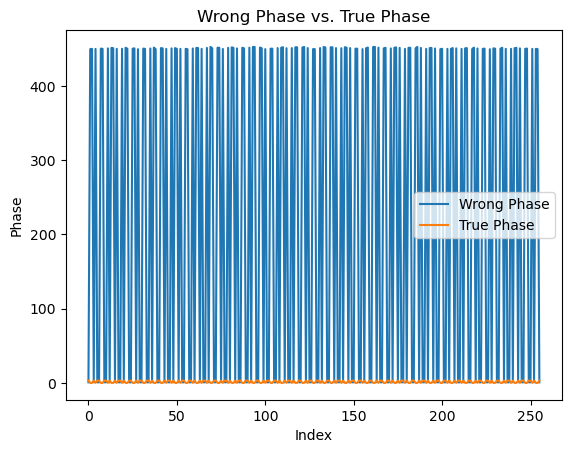

In [43]:
import matplotlib.pyplot as plt

plot_wrong = wrong_phase.cpu().detach().numpy()
plot_true = phase_true.cpu().detach().numpy()

x = range(len(wrong_phase))
plt.plot(x, plot_wrong, label="Wrong Phase")
plt.plot(x, plot_true, label="True Phase")

plt.xlabel("Index")
plt.ylabel("Phase")
plt.title("Wrong Phase vs. True Phase")
plt.legend()
plt.show()

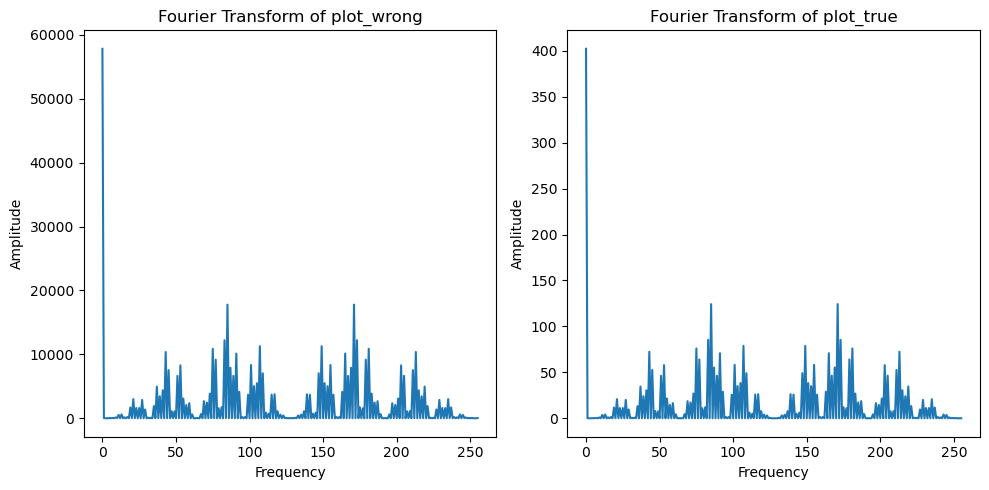

In [44]:
fft_wrong = np.fft.fft(plot_wrong)
fft_true = np.fft.fft(plot_true)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(fft_wrong))
plt.title("Fourier Transform of Predicted Phases")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(np.abs(fft_true))
plt.title("Fourier Transform of True Phases")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [26]:
torch.div(phase_true, wrong_phase)

tensor([3.7499, 0.0000, 0.0000, 3.7401, 0.0000, 3.7288, 3.7361, 0.0000, 0.0000,
        3.7331, 3.7330, 0.0000, 3.7360, 0.0000, 0.0000, 3.7339, 0.0000, 3.7288,
        3.7352, 0.0000, 3.7391, 0.0000, 0.0000, 3.7374, 3.7374, 0.0000, 0.0000,
        3.7368, 0.0000, 3.7294, 3.7323, 0.0000, 0.0000, 3.7267, 3.7315, 0.0000,
        3.7406, 0.0000, 0.0000, 3.7368, 3.7391, 0.0000, 0.0000, 3.7295, 0.0000,
        3.7272, 3.7306, 0.0000, 3.7360, 0.0000, 0.0000, 3.7437, 0.0000, 3.7304,
        3.7355, 0.0000, 0.0000, 3.7397, 3.7291, 0.0000, 3.7423, 0.0000, 0.0000,
        3.7401, 0.0000, 3.7236, 3.7284, 0.0000, 3.7315, 0.0000, 0.0000, 3.7294,
        3.7352, 0.0000, 0.0000, 3.7272, 0.0000, 3.7306, 3.7282, 0.0000, 3.7330,
        0.0000, 0.0000, 3.7304, 0.0000, 3.7260, 3.7291, 0.0000, 0.0000, 3.7293,
        3.7223, 0.0000, 3.7291, 0.0000, 0.0000, 3.7288, 3.7361, 0.0000, 0.0000,
        3.7397, 0.0000, 3.7293, 3.7426, 0.0000, 0.0000, 3.7287, 3.7291, 0.0000,
        3.7355, 0.0000, 0.0000, 3.7331, 

In [27]:
1 / 0.2886

3.465003465003465

In [28]:
phase_factor_diff = phase_predicted / phase_true
print(phase_factor_diff)

tensor([0.2667,   -inf,   -inf, 0.2674,   -inf, 0.2682, 0.2677,   -inf,   -inf,
        0.2679, 0.2679,   -inf, 0.2677,   -inf,   -inf, 0.2678,   -inf, 0.2682,
        0.2677,   -inf, 0.2674,   -inf,   -inf, 0.2676, 0.2676,   -inf,   -inf,
        0.2676,   -inf, 0.2681, 0.2679,   -inf,   -inf, 0.2683, 0.2680,   -inf,
        0.2673,   -inf,   -inf, 0.2676, 0.2674,   -inf,   -inf, 0.2681,   -inf,
        0.2683, 0.2681,   -inf, 0.2677,   -inf,   -inf, 0.2671,   -inf, 0.2681,
        0.2677,   -inf,   -inf, 0.2674, 0.2682,   -inf, 0.2672,   -inf,   -inf,
        0.2674,   -inf, 0.2686, 0.2682,   -inf, 0.2680,    inf,   -inf, 0.2681,
        0.2677,   -inf,   -inf, 0.2683,   -inf, 0.2681, 0.2682,   -inf, 0.2679,
          -inf,   -inf, 0.2681,   -inf, 0.2684, 0.2682,   -inf,   -inf, 0.2681,
        0.2687,   -inf, 0.2682,    inf,    inf, 0.2682, 0.2677,   -inf,   -inf,
        0.2674,   -inf, 0.2681, 0.2672,   -inf,   -inf, 0.2682, 0.2682,   -inf,
        0.2677,   -inf,   -inf, 0.2679, 

In [29]:
mse = torch.mean((psi_predicted - psi_true) ** 2)
print("MSE:", mse)

MSE: tensor(0.0087+0.0082j, dtype=torch.complex128, grad_fn=<MeanBackward0>)


In [30]:
real_imag = torch.view_as_real(psi_predicted)
psi_true_real_imag = torch.view_as_real(psi_true.to(torch.complex64))
print(real_imag)
print(psi_true_real_imag)

tensor([[ 0.2344,  0.2604],
        [-0.1654, -0.0538],
        [-0.0872, -0.0654],
        [ 0.0908,  0.1012],
        [-0.0835, -0.0578],
        [ 0.0397,  0.0445],
        [ 0.0498,  0.0556],
        [-0.0639, -0.1033],
        [-0.0781, -0.0620],
        [ 0.0348,  0.0389],
        [ 0.0240,  0.0269],
        [-0.0142, -0.0483],
        [ 0.0437,  0.0489],
        [ 0.0189, -0.0399],
        [-0.0015, -0.0646],
        [ 0.0782,  0.0874],
        [-0.0781, -0.0620],
        [ 0.0339,  0.0380],
        [ 0.0218,  0.0244],
        [-0.0315, -0.0290],
        [ 0.0221,  0.0247],
        [ 0.0107, -0.0179],
        [-0.0184, -0.0207],
        [ 0.0321,  0.0358],
        [ 0.0425,  0.0474],
        [-0.0221, -0.0279],
        [-0.0060, -0.0257],
        [ 0.0271,  0.0303],
        [-0.0551, -0.0095],
        [ 0.0274,  0.0307],
        [ 0.0421,  0.0472],
        [-0.0639, -0.1033],
        [-0.0835, -0.0578],
        [ 0.0342,  0.0384],
        [ 0.0217,  0.0243],
        [-0.0166, -0

In [31]:
ham = H.full_H(param=1)

In [32]:
mse = torch.mean((real_imag - psi_true_real_imag) ** 2)
print("MSE:", mse)

MSE: tensor(0.0063, grad_fn=<MeanBackward0>)


In [33]:
adam = torch.optim.Adam(model.parameters(), lr=0.01)
adam.zero_grad()
mse.backward(retain_graph=True)

Being able to produce a computational graph provides evidence that .backward and .step actually do full backpropagation with weight updates:


In [34]:
from torchviz import make_dot

In [35]:
# By user ucalyptus, from https://github.com/szagoruyko/pytorchviz/issues/41
def resize_graph(dot, size_per_element=0.15, min_size=12):
    """Resize the graph according to how much content it contains.
    Modify the graph in place.
    """
    # Get the approximate number of nodes and edges
    num_rows = len(dot.body)
    content_size = num_rows * size_per_element
    size = max(min_size, content_size)
    size_str = str(size) + "," + str(size)
    dot.graph_attr.update(size=size_str)

In [36]:
model.named_parameters()

<generator object Module.named_parameters at 0x73ee1d86f940>

In [37]:
torch.autograd.set_detect_anomaly(True)

In [38]:
# graph = make_dot(
#     mse, params=dict(model.named_parameters()), show_attrs=True, show_saved=True
# )
# resize_graph(graph, 0.7)
# graph.render("mse_full", format="png")

In [39]:
adam.step()

## Implementation in optimizer_supervised.py


In [40]:
optim = Optimizer(model, Hamiltonians, point_of_interest=point_of_interest)

In [41]:
loss = optim.calculate_mse_step(H, basis_batch=None, use_symmetry=True)
print("MSE:", loss)

TypeError: Optimizer.calculate_mse_step() missing 1 required positional argument: 'params'

In [ ]:
loss.backward(retain_graph=True)

## Generator for Points in Parameter Space


In [ ]:
import itertools

In [ ]:
def generate_parameter_range(start, end, step):
    """
    A simple generator returning the next value in a range of values
    whenever called, according to a step size.
    """
    value = start
    while value < end:
        yield value
        value += step


def generate_parameter_points(parameter_ranges, step_sizes, distribution=None):
    """
    Generate all possible combinations of parameter values for a model
    (i.e., the Cartesian product of values of parameters in a slice of parameter space)

    Parameters:
        parameter_ranges: torch.Tensor of shape (n_parameters, 2)
            The starting and ending values for each dimension of the slice of parameter space
        step_sizes: torch.Tensor of shape (n_parameters,)
            The step size for each dimension of the slice of parameter space
        distribution: N/A
            TODO: Not implemented

    """

    if distribution is not None:
        raise NotImplementedError(
            "Sampling using a custom distribution is not implemented yet."
        )

    # Every possible individual parameter value for each parameter, in order
    parameter_ranges = [
        generate_parameter_range(start.item(), end.item(), step.item())
        for (start, end), step in zip(parameter_ranges, step_sizes)
    ]

    return itertools.product(*parameter_ranges)

In [ ]:
test_parameter_ranges = torch.tensor([[0, 2 * np.pi], [0, 10], [0.5, 1.5]])
test_step_sizes = torch.tensor([0.1, 1, 0.1])

print("test_parameter_ranges:\n", test_parameter_ranges)
print("test_step_sizes:\n", test_step_sizes)

test_parameter_ranges:
 tensor([[ 0.0000,  6.2832],
        [ 0.0000, 10.0000],
        [ 0.5000,  1.5000]])
test_step_sizes:
 tensor([0.1000, 1.0000, 0.1000])


In [ ]:
for point in generate_parameter_points(test_parameter_ranges, test_step_sizes):
    print(torch.tensor(point))

tensor([0.0000, 0.0000, 0.5000])
tensor([0.0000, 0.0000, 0.6000])
tensor([0.0000, 0.0000, 0.7000])
tensor([0.0000, 0.0000, 0.8000])
tensor([0.0000, 0.0000, 0.9000])
tensor([0., 0., 1.])
tensor([0.0000, 0.0000, 1.1000])
tensor([0.0000, 0.0000, 1.2000])
tensor([0.0000, 0.0000, 1.3000])
tensor([0.0000, 0.0000, 1.4000])
tensor([0.0000, 1.0000, 0.5000])
tensor([0.0000, 1.0000, 0.6000])
tensor([0.0000, 1.0000, 0.7000])
tensor([0.0000, 1.0000, 0.8000])
tensor([0.0000, 1.0000, 0.9000])
tensor([0., 1., 1.])
tensor([0.0000, 1.0000, 1.1000])
tensor([0.0000, 1.0000, 1.2000])
tensor([0.0000, 1.0000, 1.3000])
tensor([0.0000, 1.0000, 1.4000])
tensor([0.0000, 2.0000, 0.5000])
tensor([0.0000, 2.0000, 0.6000])
tensor([0.0000, 2.0000, 0.7000])
tensor([0.0000, 2.0000, 0.8000])
tensor([0.0000, 2.0000, 0.9000])
tensor([0., 2., 1.])
tensor([0.0000, 2.0000, 1.1000])
tensor([0.0000, 2.0000, 1.2000])
tensor([0.0000, 2.0000, 1.3000])
tensor([0.0000, 2.0000, 1.4000])
tensor([0.0000, 3.0000, 0.5000])
tensor([0.000

In [ ]:
torch.tensor(point).shape

torch.Size([3])

In [ ]:
torch.tensor([[1], [2], [3]]).shape

torch.Size([3, 1])

In [ ]:
print(H.system_size)

tensor([8])


See supervised_learning.ipynb for code that runs an MSE loss minimization loop.
